# TASK 2 :
Perform an in depth exploratory data analysis (EDA) on a dataset to identify trends, patterns,
anomalies, and factors influencing performance.

# PROJECT 1: General EDA

# STEP 1 : IMPORTING LIBRARIES AND LOADING DATASET
Ensure all required libraries are installed. If not, install them using and Verify the file path and encoding:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
try:
    df = pd.read_csv('Global_Superstore2.csv', encoding='ISO 8859 1')  # Adjust encoding as needed
    print("Dataset Loaded Successfully!")
    print(df.head())  # Display the first few rows
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset Loaded Successfully!
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0  

# STEP 2 : Data Cleaning

In [19]:
# Handle Missing Values: Replace missing values with the column mean for numeric columns.
df.fillna(df.mean(numeric_only=True), inplace=True)
print("Missing values handled!")

# Remove Duplicates
df.drop_duplicates(inplace=True)
print(f"Duplicates removed! Current shape: {df.shape}")

# Handle Outliers using IQR: Ensure outlier handling only applies to numeric columns.
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3   Q1

# Filter rows within acceptable range
df = df[~((df.select_dtypes(include=[np.number]) < (Q1   1.5 * IQR)) | 
          (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers handled!")

Missing values handled!
Duplicates removed! Current shape: (51290, 24)
Outliers handled!


# STEP 3 : Statistical Analysis

In [23]:
print("Statistical Analysis:")
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Standard Deviation:\n", df.std(numeric_only=True))
print("Correlation Matrix:\n", df.corr(numeric_only=True))

Statistical Analysis:
Mean:
 Row ID           21948.486614
Postal Code      55190.379428
Sales              100.203369
Quantity             3.025389
Discount             0.090520
Profit              14.289823
Shipping Cost        9.909052
dtype: float64
Median:
 Row ID           19556.000000
Postal Code      55190.379428
Sales               62.700000
Quantity             3.000000
Discount             0.000000
Profit               8.856000
Shipping Cost        5.920000
dtype: float64
Standard Deviation:
 Row ID           1.505422e+04
Postal Code      1.358445e-08
Sales            1.002244e+02
Quantity         1.866765e+00
Discount         1.572315e-01
Profit           2.414750e+01
Shipping Cost    1.071663e+01
dtype: float64
Correlation Matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000          NaN -0.033470 -0.266347 -0.194026  0.056208   
Postal Code         NaN          NaN       NaN       NaN       NaN       NaN   
Sales

# STEP 4 : Data Visualization

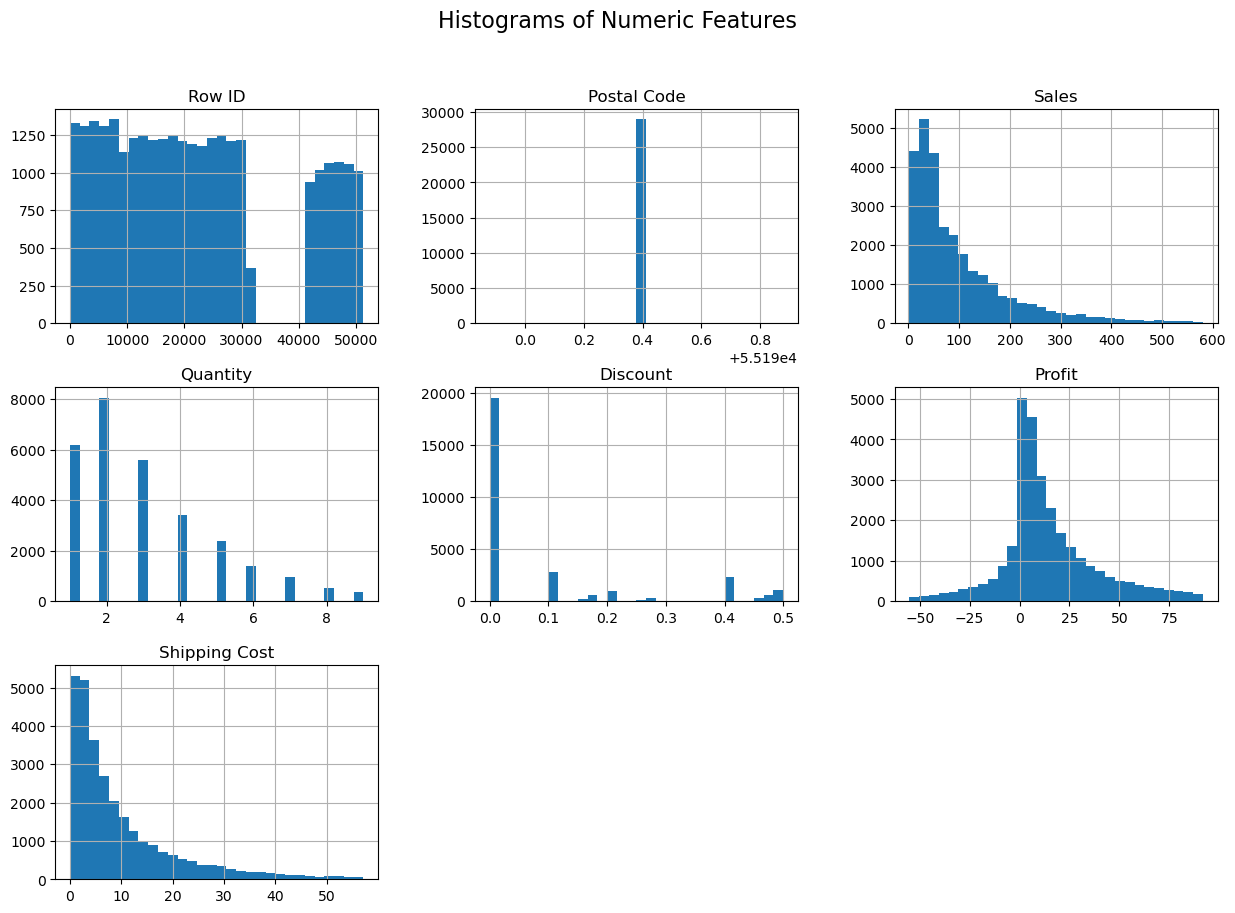

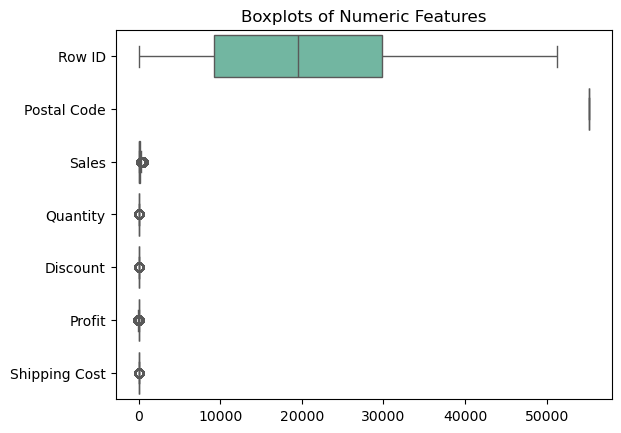

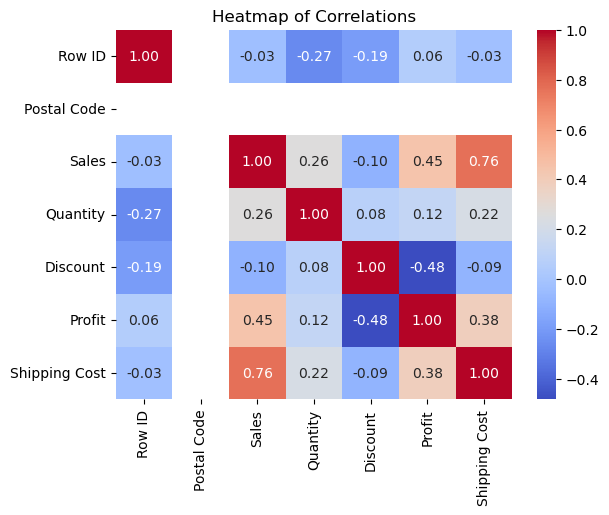

In [30]:
# Histograms: Display numerical column distributions
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

# Boxplots: Visualize outliers for numerical data
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h', palette='Set2')
plt.title("Boxplots of Numeric Features")
plt.show()

# Heatmaps: Correlations between numeric columns.
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlations")
plt.show()


# PROJECT  2 : Sales Performance Analysis 

In [69]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Load Sales Dataset
sales_df = pd.read_csv('sales_data_sample.csv', encoding='latin1')  # Ensure proper encoding

# Step 2: Data Cleaning
# Remove duplicates
sales_df.drop_duplicates(inplace=True)

# Handle missing values (numeric columns)
sales_df.fillna(sales_df.mean(numeric_only=True), inplace=True)

# Convert Date column to datetime
if 'OrderDate' in sales_df.columns:
    sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'], errors='coerce')
else:
    print("The 'OrderDate' column is not present.")

# Step 3: Exploratory Data Analysis (EDA)
# Sales trends over time
if 'OrderDate' in sales_df.columns and 'Sales' in sales_df.columns:
    sales_df.groupby('OrderDate')['Sales'].sum().plot(kind='line', figsize=(10, 6), title='Sales Trends Over Time')
    plt.xlabel('Order Date')
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("Columns 'OrderDate' or 'Sales' are missing.")

# Scatter plot: Profit vs. Discount
if 'Profit' in sales_df.columns and 'Discount' in sales_df.columns:
    sns.scatterplot(data=sales_df, x='Profit', y='Discount')
    plt.title('Profit vs Discount')
    plt.show()
else:
    print("Columns 'Profit' or 'Discount' are missing.")

# Sales by Region
if 'Region' in sales_df.columns and 'Sales' in sales_df.columns:
    sales_by_region = sales_df.groupby('Region')['Sales'].sum()
    sales_by_region.plot(kind='bar', title='Sales by Region', figsize=(8, 5))
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("Columns 'Region' or 'Sales' are missing.")

# Sales by Product Line
if 'ProductLine' in sales_df.columns and 'Sales' in sales_df.columns:
    sales_by_category = sales_df.groupby('ProductLine')['Sales'].sum()
    sales_by_category.plot(kind='bar', title='Sales by Product Line', figsize=(8, 5))
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("Columns 'ProductLine' or 'Sales' are missing.")

# Step 4: Predictive Modeling
# Prepare data for modeling
if {'Profit', 'Discount', 'Sales'}.issubset(sales_df.columns):
    X = sales_df[['Profit', 'Discount']]
    y = sales_df['Sales']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print("R² Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
else:
    print("Columns 'Profit', 'Discount', or 'Sales' are missing.")


The 'OrderDate' column is not present.
Columns 'OrderDate' or 'Sales' are missing.
Columns 'Profit' or 'Discount' are missing.
Columns 'Region' or 'Sales' are missing.
Columns 'ProductLine' or 'Sales' are missing.
Columns 'Profit', 'Discount', or 'Sales' are missing.
